In [1]:
from google.colab import files
files.upload()

Saving ss.csv to ss.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'ss.csv': b'ID,electricity_consumption\n552,0\n553,0\n554,0\n555,0\n556,0\n557,0\n558,0\n559,0\n560,0\n561,0\n562,0\n563,0\n564,0\n565,0\n566,0\n567,0\n568,0\n569,0\n570,0\n571,0\n572,0\n573,0\n574,0\n575,0\n576,0\n577,0\n578,0\n579,0\n580,0\n581,0\n582,0\n583,0\n584,0\n585,0\n586,0\n587,0\n588,0\n589,0\n590,0\n591,0\n592,0\n593,0\n594,0\n595,0\n596,0\n597,0\n598,0\n599,0\n600,0\n601,0\n602,0\n603,0\n604,0\n605,0\n606,0\n607,0\n608,0\n609,0\n610,0\n611,0\n612,0\n613,0\n614,0\n615,0\n616,0\n617,0\n618,0\n619,0\n620,0\n621,0\n622,0\n623,0\n624,0\n625,0\n626,0\n627,0\n628,0\n629,0\n630,0\n631,0\n632,0\n633,0\n634,0\n635,0\n636,0\n637,0\n638,0\n639,0\n640,0\n641,0\n642,0\n643,0\n644,0\n645,0\n646,0\n647,0\n648,0\n649,0\n650,0\n651,0\n652,0\n653,0\n654,0\n655,0\n656,0\n657,0\n658,0\n659,0\n660,0\n661,0\n662,0\n663,0\n664,0\n665,0\n666,0\n667,0\n668,0\n669,0\n670,0\n671,0\n672,0\n673,0\n674,0\n675,0\n676,0\n677,0\n678,0\n679,0\n680,0\n681,0\n682,0\n683,0\n684,0\n685,0\n686,0\n687,0\n688,0\n

In [2]:
pip install pmdarima 

     |████████████████████████████████| 1.5MB 7.2MB/s 
     |████████████████████████████████| 8.7MB 15.0MB/s 
     |████████████████████████████████| 808kB 43.4MB/s 
     |████████████████████████████████| 2.1MB 49.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


# Importing Libraries

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error , mean_absolute_error 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

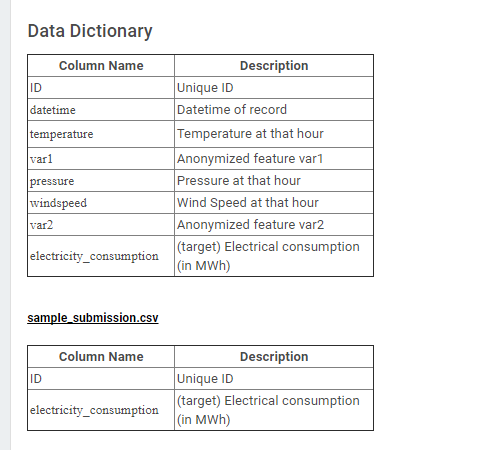

In [7]:
train=pd.read_csv('train.csv',parse_dates=[1])
test=pd.read_csv('test.csv',parse_dates=[1])
ss=pd.read_csv('ss.csv')

train.shape, test.shape, ss.shape

((26496, 8), (8568, 7), (8568, 2))

In [8]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [9]:
test.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A
8567,35063,2017-06-30 23:00:00,-5.0,-16.4,1001.0,250.600,A


# Concatenating train and test for faster manipulating of data

In [10]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)                 

In [11]:
df.shape

(35064, 8)

In [12]:
df['var2'].value_counts()

A    33416
C     1364
B      284
Name: var2, dtype: int64

In [13]:
df=pd.get_dummies(df, columns=["var2"])

In [14]:
df[['var2_A','var2_B','var2_C']] = df[['var2_A','var2_B','var2_C']].astype(int)

In [15]:
df.tail()

,ID,datetime,temperature,var1,pressure,windspeed,electricity_consumption,var2_A,var2_B,var2_C
35059,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,NaN,1,0,0
35060,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,NaN,1,0,0
35061,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,NaN,1,0,0
35062,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,NaN,1,0,0
35063,35063,2017-06-30 23:00:00,-5.0,-16.4,1001.0,250.600,NaN,1,0,0


In [16]:
for attr in ['hour','year', 'month', 'day', 'week', 'dayofweek']:                                                                     # running loop for extracting new features from date
  df[attr] = getattr(df['datetime'].dt, attr)

In [17]:
df.tail()

,ID,datetime,temperature,var1,pressure,windspeed,electricity_consumption,var2_A,var2_B,var2_C,hour,year,month,day,week,dayofweek
35059,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,NaN,1,0,0,19,2017,6,30,26,4
35060,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,NaN,1,0,0,20,2017,6,30,26,4
35061,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,NaN,1,0,0,21,2017,6,30,26,4
35062,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,NaN,1,0,0,22,2017,6,30,26,4
35063,35063,2017-06-30 23:00:00,-5.0,-16.4,1001.0,250.600,NaN,1,0,0,23,2017,6,30,26,4


In [18]:
df.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'electricity_consumption', 'var2_A', 'var2_B', 'var2_C', 'hour', 'year',
       'month', 'day', 'week', 'dayofweek'],
      dtype='object')

In [19]:
features =['temperature', 'var1', 'pressure', 'windspeed',
       'var2_A', 'var2_B', 'var2_C', 'hour', 'year',
       'month', 'day', 'week', 'dayofweek']

# Splitting back to train and test

In [20]:
train, test = df[:train.shape[0]].reset_index(drop = True), df[train.shape[0]:].reset_index(drop = True)    

train.shape, test.shape

((26496, 16), (8568, 16))

In [21]:
ID_COL, TARGET_COL = 'ID', 'electricity_consumption'

In [22]:
ss.head()

,ID,electricity_consumption
0,552,0
1,553,0
2,554,0
3,555,0
4,556,0


In [23]:
train.nunique()

ID                         26496
datetime                   26496
temperature                   60
var1                          71
pressure                      73
windspeed                   5603
electricity_consumption      252
var2_A                         2
var2_B                         2
var2_C                         2
hour                          24
year                           5
month                         12
day                           23
week                          53
dayofweek                      7
dtype: int64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26496 non-null  int64         
 1   datetime                 26496 non-null  datetime64[ns]
 2   temperature              26496 non-null  float64       
 3   var1                     26496 non-null  float64       
 4   pressure                 26496 non-null  float64       
 5   windspeed                26496 non-null  float64       
 6   electricity_consumption  26496 non-null  float64       
 7   var2_A                   26496 non-null  int64         
 8   var2_B                   26496 non-null  int64         
 9   var2_C                   26496 non-null  int64         
 10  hour                     26496 non-null  int64         
 11  year                     26496 non-null  int64         
 12  month                    26496 n

## Target Distribution (Electricity Distribution)



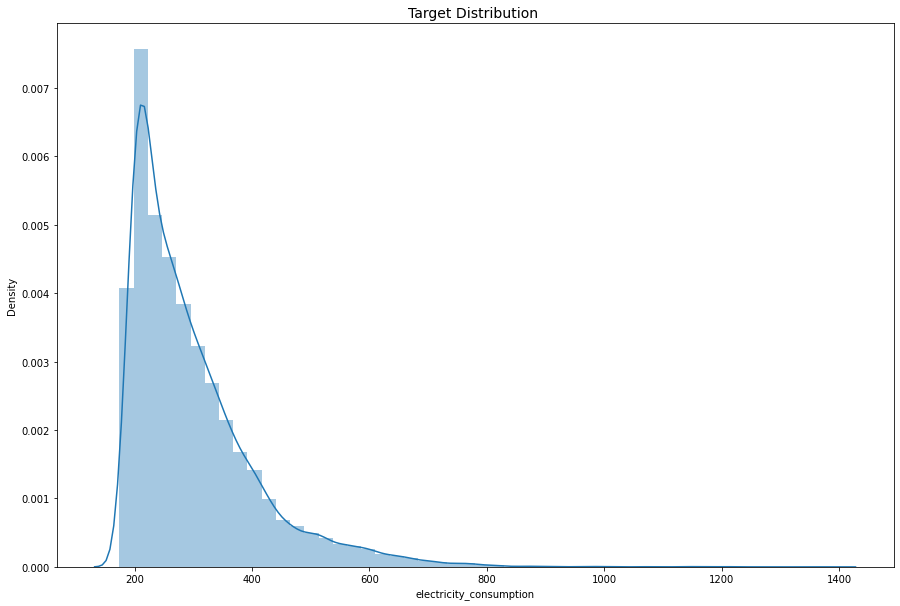

In [25]:
plt.figure(figsize=(15,10))
_=sns.distplot(train[TARGET_COL])
_=plt.title("Target Distribution ",fontsize=14)

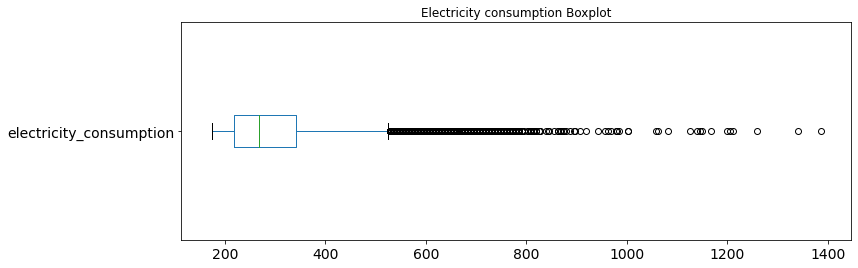

In [26]:
_ = train[TARGET_COL].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Electricity consumption Boxplot', fontsize=14)

# % of NAN values

In [27]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

dayofweek                  0.0
week                       0.0
day                        0.0
month                      0.0
year                       0.0
hour                       0.0
var2_C                     0.0
var2_B                     0.0
var2_A                     0.0
electricity_consumption    0.0
windspeed                  0.0
pressure                   0.0
var1                       0.0
temperature                0.0
datetime                   0.0
ID                         0.0
dtype: float64

# Categorical and Numerical features

In [28]:
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_cols = df.select_dtypes(include=['object'])

# categorical features
cat_cols = [c for c in features if c in cat_cols]

# numerical features
num_cols = [c for c in features if c not in cat_cols]

print('categorical variables')
display(cat_cols)
print('numerical variables')
display(num_cols)

categorical variables


[]

numerical variables


['datetime',
 'temperature',
 'var1',
 'pressure',
 'windspeed',
 'var2_A',
 'var2_B',
 'var2_C',
 'hour',
 'year',
 'month',
 'day',
 'week',
 'dayofweek']

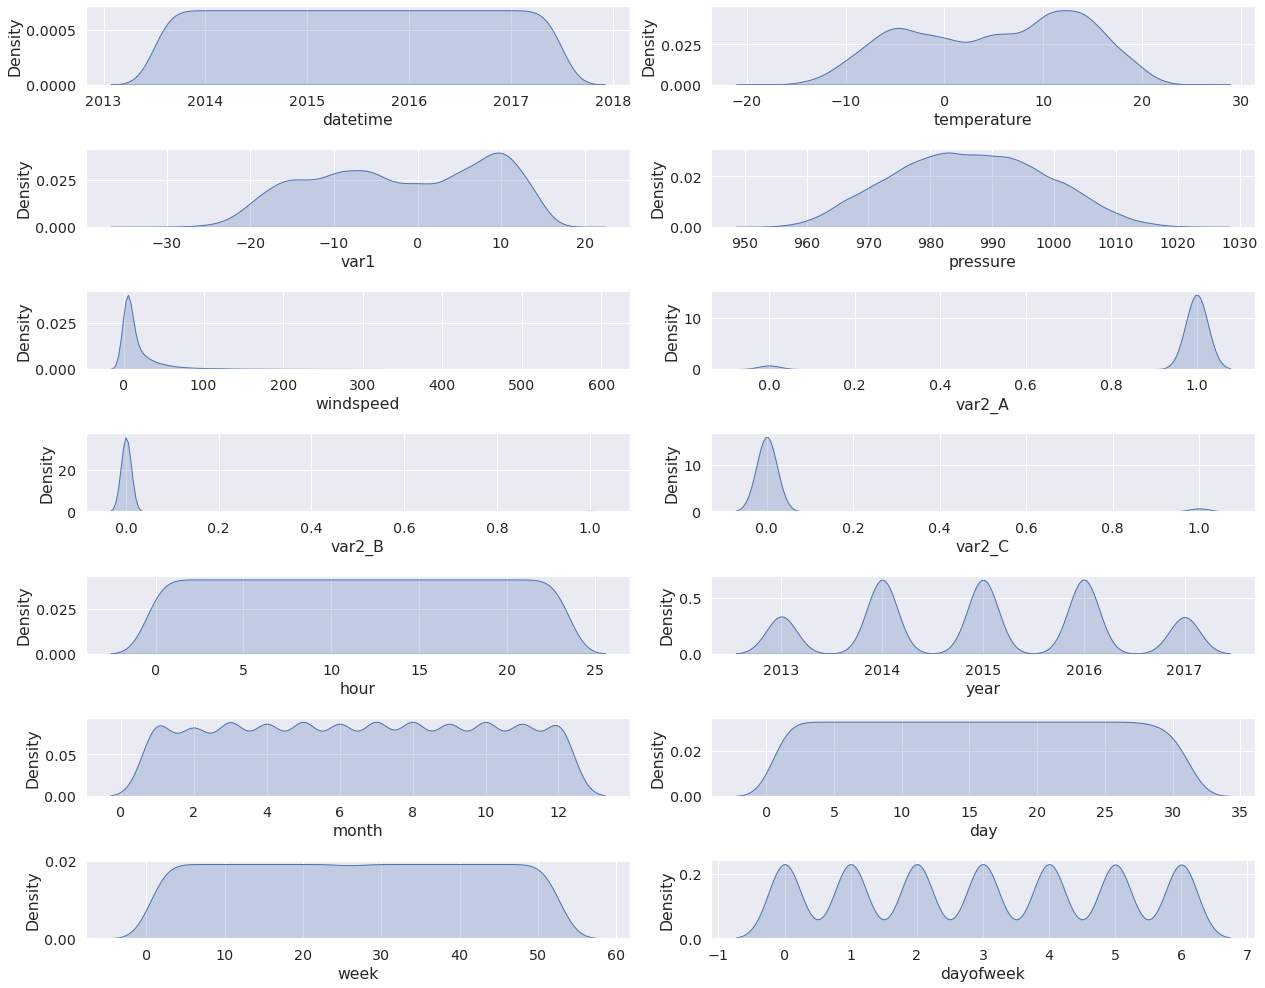

In [29]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(7, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=df, x=c, ax=axes[i], fill=True)
plt.tight_layout()

**windspeed** AND **electricity_consumption** are skewed data

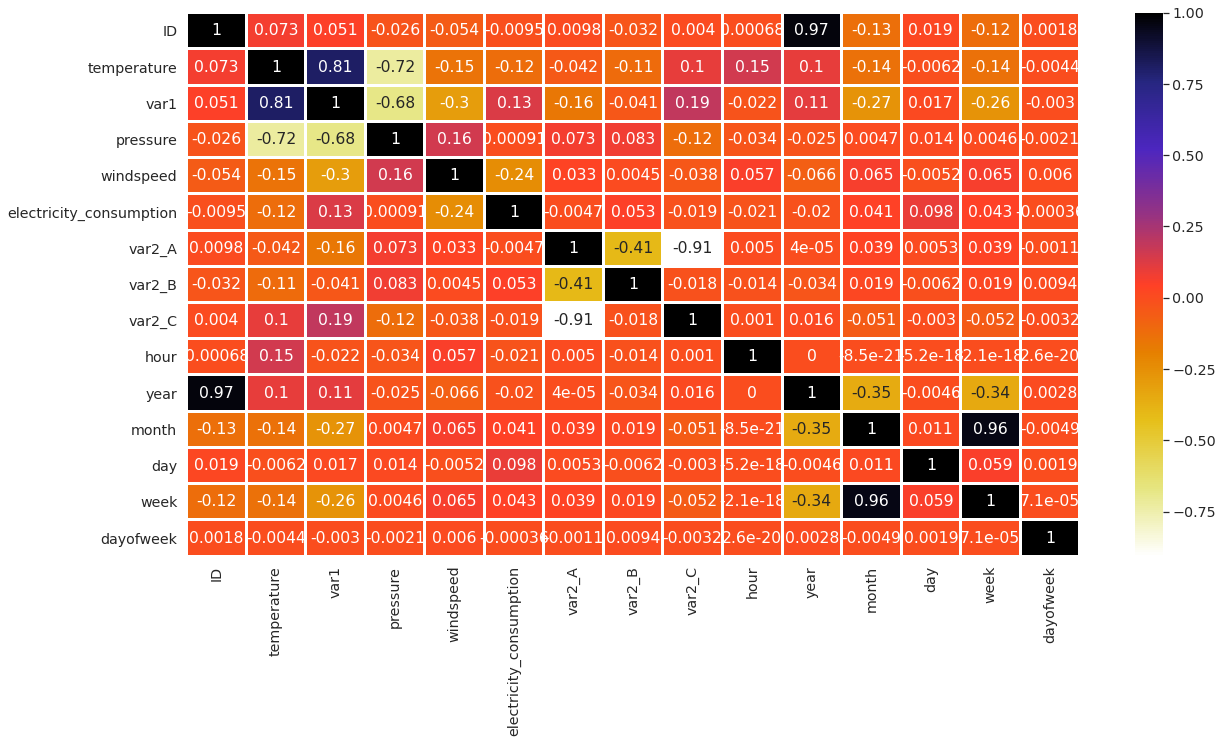

In [30]:
#Pearson Corellation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=2)

# Graphs

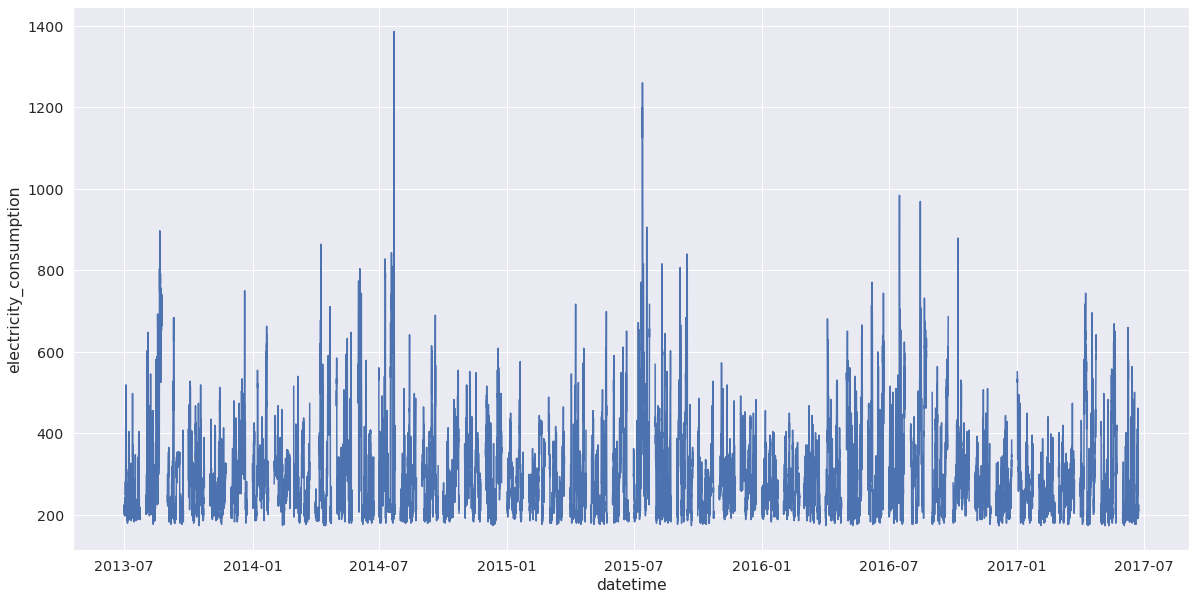

In [31]:
plt.figure(figsize= (20,10))
sns.lineplot(data=df,x='datetime',y='electricity_consumption')

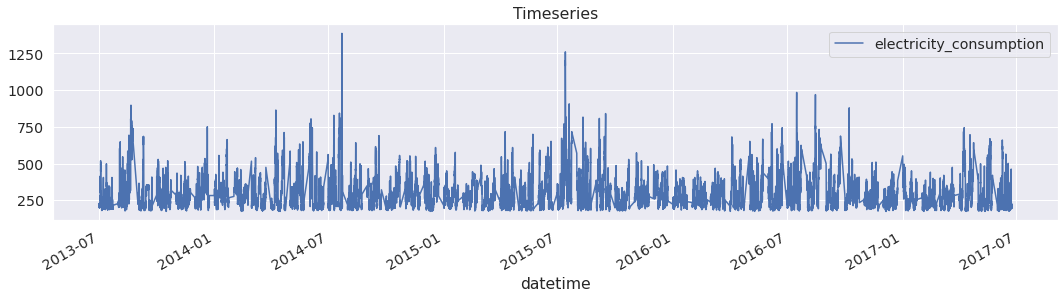

In [32]:
_=train.set_index('datetime')[['electricity_consumption']].plot(figsize=(18,4),title= 'Timeseries')

# No. of records each year

In [34]:
df['datetime'].dt.year.value_counts()

2016    8784
2015    8760
2014    8760
2013    4416
2017    4344
Name: datetime, dtype: int64

# Test for stationarity

In [35]:
def test_stationarity(timeseries):                                               
  
  #Determining rolling statistics
  rolmean= timeseries.rolling(12).mean()                                        # rolling mean
  rolstd = timeseries.rolling(12).std()                                         # rolling standard Deviation

  #Plot Rolling statistics:
  plt.plot(timeseries, color='blue', label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label='Rolling std') 
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)

  print("Results of Dicky Fuller test")
  adft = adfuller(timeseries,autolag = 'AIC')                                   #Dicky Fuller test to check p-value and confirm stationarity

  output=pd.Series(adft[0:4], index = ['ADF Test Statistics', 'p-value', '#Lags used', 'No. of observations used'])
  for key,values in adft[4].items():
    output['critical value (%s)' %key] = values
  print(output)

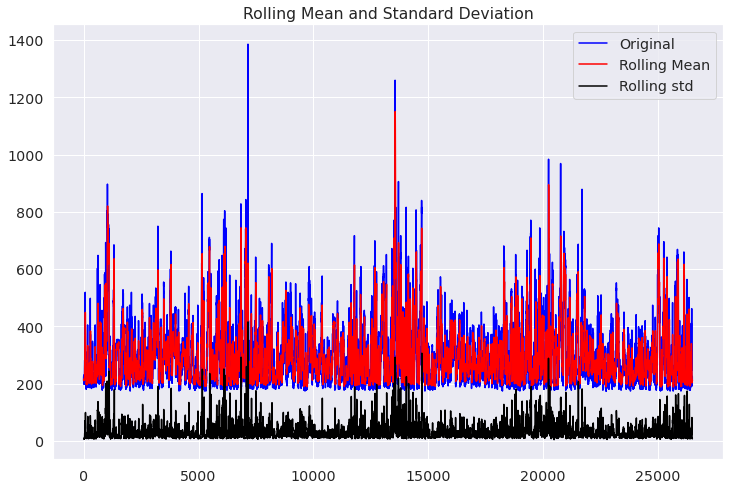

Results of Dicky Fuller test
ADF Test Statistics        -1.759191e+01
p-value                     3.960100e-30
#Lags used                  3.800000e+01
No. of observations used    2.645700e+04
critical value (1%)        -3.430597e+00
critical value (5%)        -2.861649e+00
critical value (10%)       -2.566828e+00
dtype: float64


In [36]:
fig = plt.figure(figsize=(12,8))
test_stationarity(train.electricity_consumption)

p-value                     3.960100e-30 --- **seems stationary**

# Decomposing Seasonality

<Figure size 432x288 with 0 Axes>

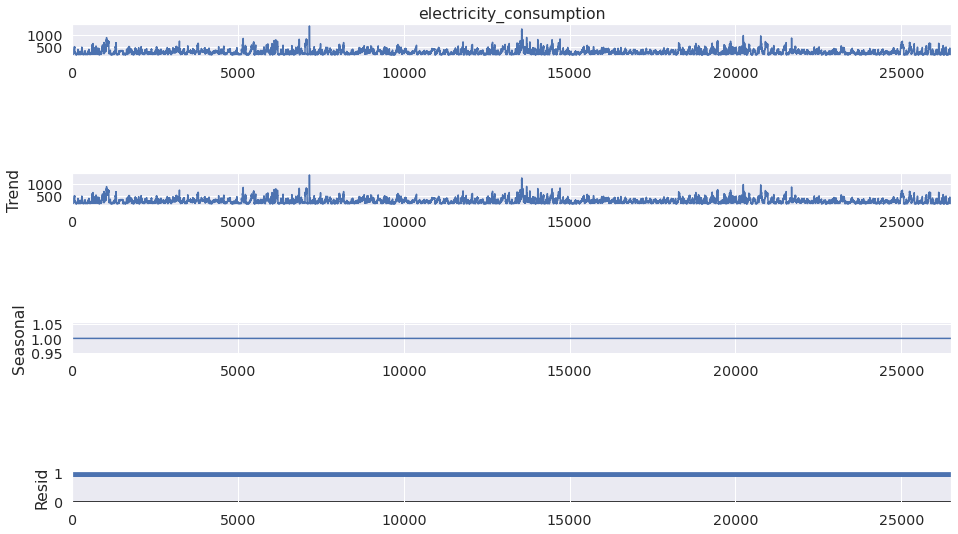

In [37]:
result = seasonal_decompose (train.electricity_consumption, model='multiplicative',  freq= 1)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

# *AUTO* ARIMA

In [38]:
train.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'electricity_consumption', 'var2_A', 'var2_B', 'var2_C', 'hour', 'year',
       'month', 'day', 'week', 'dayofweek'],
      dtype='object')

In [39]:
df3 = train[[ 'var1']]                 #EXOGENOUS Variable

model_autoARIMA = auto_arima(train.electricity_consumption, 
                             start_p = 0,start_q = 0,
                             test='adf',                        # use adftest to find optimal 'd'
                             max_p=3,max_q=3,
                             m=1,                               #frequency of series
                             d=None,                            #let model determine 'd'
                             seasonal=False,                    # No seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True,
                             exogenous=df3)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=380005.813, Time=7.76 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=3.64 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=346998.858, Time=8.98 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=259273.538, Time=10.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=259273.616, Time=10.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=259268.949, Time=18.96 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=323270.476, Time=23.91 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=259274.172, Time=18.97 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=259269.286, Time=21.39 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=307552.439, Time=29.98 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=259272.945, Time=50.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=258712.548, Time=25.48 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=282118.729, Time=27.97 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=258711.318, Time=16.33 sec
 

In [40]:
model=ARIMA(train.electricity_consumption, order=(2,0,0))
fitted=model.fit(disp=-1)
print(fitted.summary())

                                 ARMA Model Results                                
Dep. Variable:     electricity_consumption   No. Observations:                26496
Model:                          ARMA(2, 0)   Log Likelihood             -129415.601
Method:                            css-mle   S.D. of innovations             31.988
Date:                     Sun, 29 Nov 2020   AIC                         258839.202
Time:                             11:48:09   BIC                         258871.941
Sample:                                  0   HQIC                        258849.769
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           298.2160      4.205     70.928      0.000     289.975     306.457
ar.L1.electricity_consumption     

# Seaonal ARIMA with Exodus variable - SARIMAX

In [41]:
model = SARIMAX(train.electricity_consumption,
                exog=df3,                                                       #Exogenous Variable
                order=(2,0,0),                                                  #p,d,q order
                enforce_invertibility=False, enforce_stationarity=False)

In [42]:
forecast = pd.DataFrame()                                                       # Dataframe for one of the days
predictions = list() 

In [43]:
len(pd.unique(train.day))+1                                                       #No. of days of each month in train data

24

In [44]:
train.electricity_consumption

0        216.0
1        210.0
2        225.0
3        216.0
4        222.0
         ...  
26491    225.0
26492    213.0
26493    213.0
26494    210.0
26495    210.0
Name: electricity_consumption, Length: 26496, dtype: float64

In [45]:
for i in range(1,len(pd.unique(train.day)+1)):
    df2 = train[train.day==i]                                                   # df of one day at a time
    df3 = df2[["var1"]]                                                           # df of exogenous variables (var1)
    
    model_autoARIMA = auto_arima(np.log(df2.electricity_consumption),           # Taking log (electricity_consumption)
                             start_p = 0,start_q = 0,
                             test='adf',                                        # use adftest to find optimal 'd'
                             max_p=10,max_q=10,
                             m=1,                                               #frequency of seasonality
                             d=None,                                            #let model determine 'd'
                             seasonal=False,                                    # No seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True,
                             out_of_sample_size=250,
                             )
    model = SARIMAX(np.log(df2.electricity_consumption),                      # Taking log (Close)
                    trend = 'ct',
                    time_varying_regression=True,
                    mle_regression=False,
                    harvey_representation=True,
                   
                    order=model_autoARIMA.get_params()['order'],
                    enforce_invertibility=False, enforce_stationarity=True)
    
    fitted=model.fit(method='powell',
                    cov_type='robust')
   

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7250.659, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5693.184, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1555.178, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1555.514, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1551.335, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1555.341, Time=0.81 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1553.143, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1580.035, Time=1.35 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=2.94 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-1550.818, Time=1.55 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1563.521, Time=1.00 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-15

# Test data prediction

In [46]:
for i in range(24,32):
    
    print(i)
    df_test2 = test[test.day==i]                                                #dataframe for each day of test data
    df_test3 = df_test2['var1']                                                 #Exogenous variables in test data
    
    forecast_1= fitted.forecast(steps= len(df_test2.day))                       #Storing Forecasts for each day record of test data
                                
    
    forecast_1 = np.exp(forecast_1)                                             #Transforming back from log to normal
    
    temp = df2.iloc[:42]
    temp2 = temp[['electricity_consumption']]

    ID=df_test2.ID.tolist()                                                         
    d= {'ID':ID, 'electricity_consumption':forecast_1}                          #dictionary
    data = pd.DataFrame(d)                                                      #Converting dictionary to dataframe
    forecast = forecast.append(data,ignore_index=True)                          #Appending predictions and ingonring index column                                          


24
25
26
27
28
29
30
31


In [47]:
forecast

,ID,electricity_consumption
0,552,202.227495
1,553,209.109485
2,554,215.644183
3,555,221.833191
4,556,227.680975
...,...,...
8563,34339,318.336143
8564,34340,318.354906
8565,34341,318.373671
8566,34342,318.392436


In [48]:
forecast.shape, test.shape

((8568, 2), (8568, 16))

In [49]:
forecast.to_csv('forecast.csv', index=False)
from google.colab import files
files.download('forecast.csv')                               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
ss.head()          #sample submission

,ID,electricity_consumption
0,552,0
1,553,0
2,554,0
3,555,0
4,556,0


In [51]:
forecast.head()   #predictions

,ID,electricity_consumption
0,552,202.227495
1,553,209.109485
2,554,215.644183
3,555,221.833191
4,556,227.680975
